<a href="https://colab.research.google.com/github/swostika17/CN6005AI/blob/main/Week_5_Digit_Classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow
import keras
from tensorflow.keras.layers import BatchNormalization,Flatten,Dropout,Dense,Conv2D,MaxPooling2D
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading the MNIST dataset
from keras.datasets import mnist
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [ ]:
print(X_train.shape)
print(X_train[0])

(60000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 25

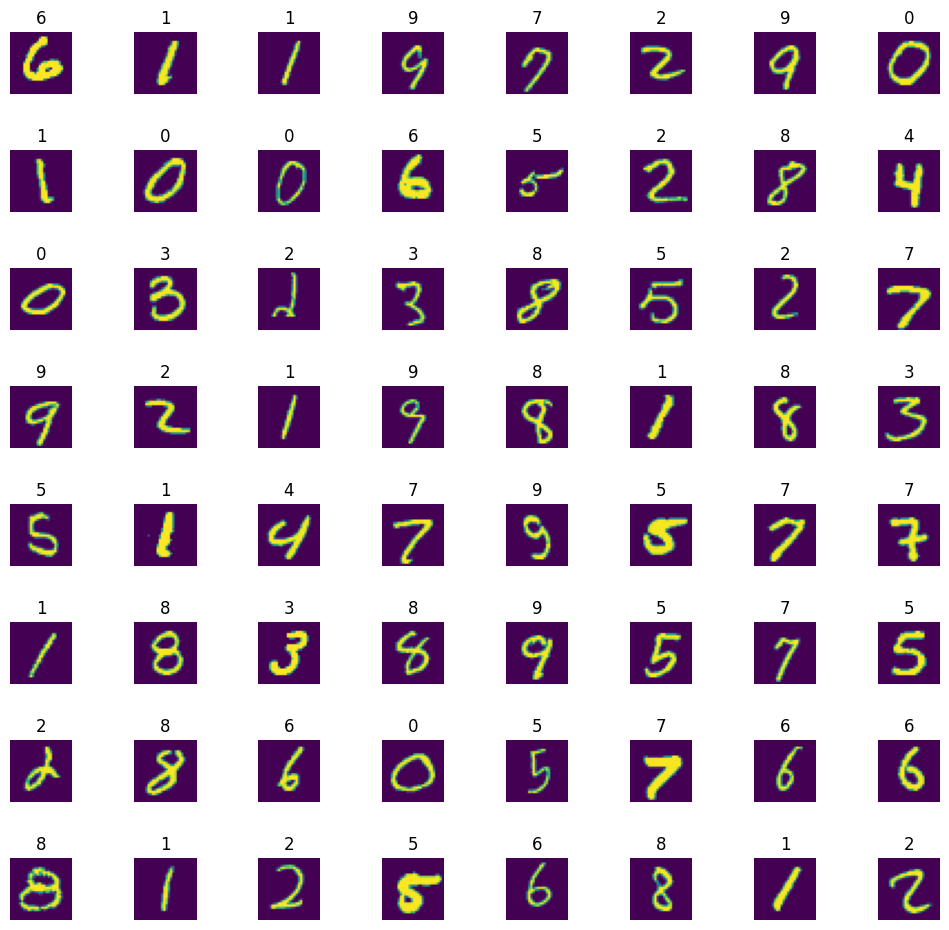

In [ ]:
# Display some images
from sklearn.utils import shuffle
def showImages(num_row,num_col,X,Y):
    import matplotlib.pyplot as plt


    (X_rand, Y_rand) = shuffle(X, Y)

    fig, axes = plt.subplots(num_row,num_col,figsize = (12,12))
    axes = axes.ravel()
    for i in range(0, num_row*num_col):
        axes[i].imshow(X_rand[i])
        axes[i].set_title("{}".format(Y_rand.item(i)))
        axes[i].axis('off')
        plt.subplots_adjust(wspace =1)

    return
num_row = 8
num_col = 8
showImages(num_row,num_col,X =X_train,Y = y_train)

In [ ]:
# Preprocessing the dataset
X_train = X_train / 255
X_test = X_test / 255
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, Dropout, Flatten, Dense, Input

model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, kernel_size=3, activation='relu', kernel_initializer='he_normal'),
    BatchNormalization(),
    Conv2D(32, kernel_size=3, activation='relu', kernel_initializer='he_normal'),
    BatchNormalization(),
    Conv2D(32, kernel_size=5, strides=2, padding='same', activation='relu', kernel_initializer='he_normal'),
    BatchNormalization(),
    Dropout(0.3),
    Conv2D(64, kernel_size=3, activation='relu', kernel_initializer='he_normal'),
    BatchNormalization(),
    Conv2D(64, kernel_size=3, activation='relu', kernel_initializer='he_normal'),
    BatchNormalization(),
    Conv2D(64, kernel_size=5, strides=2, padding='same', activation='relu', kernel_initializer='he_normal'),
    BatchNormalization(),
    Dropout(0.3),
    Conv2D(128, kernel_size=4, activation='relu', kernel_initializer='he_normal'),
    BatchNormalization(),
    Flatten(),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, validation_split=0.2, epochs=5, batch_size=64)


Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 230s 289ms/step - accuracy: 0.8424 - loss: 0.5160 - val_accuracy: 0.9862 - val_loss: 0.0454
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 201s 268ms/step - accuracy: 0.9817 - loss: 0.0611 - val_accuracy: 0.9855 - val_loss: 0.0473
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 210s 280ms/step - accuracy: 0.9867 - loss: 0.0442 - val_accuracy: 0.9895 - val_loss: 0.0371
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 200s 267ms/step - accuracy: 0.9894 - loss: 0.0352 - val_accuracy: 0.9902 - val_loss: 0.0309
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 203s 269ms/step - accuracy: 0.9891 - loss: 0.0341 - val_accuracy: 0.9893 - val_loss: 0.0366


In [ ]:
# Evaluating the model
test_loss, test_acc = model.evaluate(X_test,y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9915 - loss: 0.0238
Test accuracy: 0.9930999875068665


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step


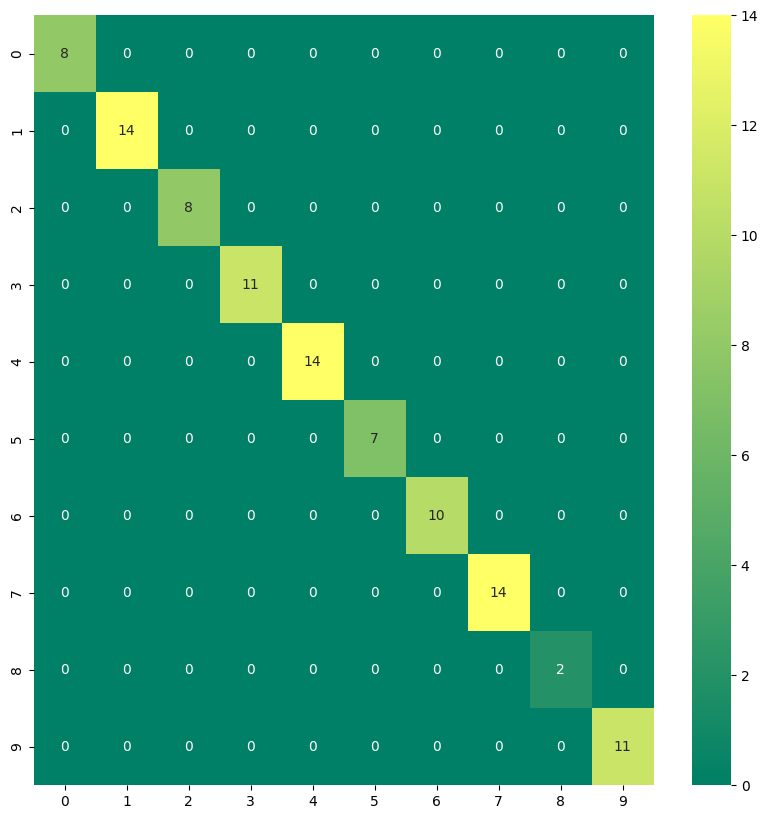

In [ ]:
predictions=model.predict(X_test[1:100])
predictions=np.argmax(predictions,axis=1)
plt.figure(figsize=(10,10))
cm=confusion_matrix(y_test[1:100],predictions)
ax= plt.subplot()
sns.heatmap(cm, annot=True,cmap='summer', fmt='g', ax=ax);

In [ ]:
print(X_test[1:5].shape)

(4, 28, 28)


In [ ]:
print(predictions.shape)
print(y_test.shape)

(99,)
(10000,)
